In [1]:
#notebook to find and plot mean waveforms 


In [2]:
#import all the standards and data


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import sys
sys.path.append('../')

import Equations_v2

In [4]:
T20_file_name = "T20_data.csv"

T20_data = pd.read_csv(T20_file_name,
                       index_col=0,
                       parse_dates=True)

In [5]:
#select just the baseline part

T20_baseline = T20_data[T20_data['Light_period'] == 'Baseline']

In [6]:
#bodge to just get columns with data in 
T20_baseline_cut=T20_baseline.iloc[:,1:8]

In [8]:
#create class instance 
baseline_split_period = Equations_v2.split_by_period(T20_baseline_cut)

In [9]:
#call function to split
baseline_split_period.split_period()

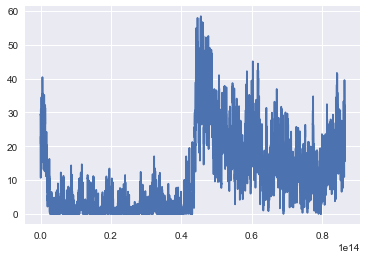

In [10]:
#quick plot the results

plt.plot(baseline_split_period.split_completed_list[0].mean(axis=1))

In [11]:
#now do the same for the disrupted list - going to have to call LS to get the period_list

T20_disrupted =  T20_data[T20_data['Light_period'] == 'Disrupted']

In [13]:
T20_disrupted_cut = T20_disrupted.iloc[:,1:8]

In [14]:
#do the lombscargle to get the period_list

#create the class 
T20_class = Equations_v2.Circadian_Analysis(T20_disrupted_cut)

In [15]:
#call LS function
T20_class.LombScargle_period()

In [385]:
#grab just the Period_list 

T20_class.LS_Period_list

['24H 20T', '24H 22T', '24H 14T', '24H 10T', '24H 34T', '24H 15T', '20H 2T']

In [16]:
#create a new class for split with data and period list

disrupted_split_period = Equations_v2.split_by_period(T20_disrupted_cut,
                                                                period_list=T20_class.LS_Period_list)

In [17]:
#call the split function
disrupted_split_period.split_period()

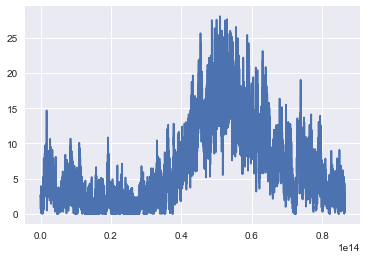

In [18]:
#plot the output

plt.plot(disrupted_split_period.split_completed_list[0].mean(axis=1))

In [19]:
#now do as a 20 hour basis

disrupted_split_20hr = Equations_v2.split_by_period(T20_disrupted_cut,
                                                            period_list=["20H" for ii in range(len(T20_disrupted_cut.columns))])




In [20]:
#call the split function
disrupted_split_20hr.split_period()

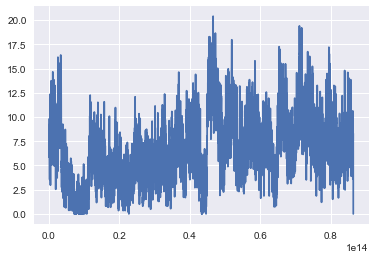

In [21]:
#plot

plt.plot(disrupted_split_20hr.split_completed_list[0].mean(axis=1))


In [22]:
#now what about as a change of baseline?

#grab as variables
#baseline 
baseline_days = baseline_split_period.split_completed_list[3].mean(axis=1).values

#disrupted
disrupted_days = disrupted_split_period.split_completed_list[3].mean(axis=1).values

#within change 
normalised_change = disrupted_days[:len(baseline_days)] - baseline_days[:len(disrupted_days)]

In [23]:
len(baseline_days)

8652

In [24]:
len(disrupted_days)

8713

In [25]:
disrupted_split_period.split_completed_list[0]

,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,...,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1,PIR1
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
00:00:09.848000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
00:00:19.696000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:29.544000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:39.392000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:49.240000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:00:59.088000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
00:01:08.936000,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
00:01:18.784000,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
00:01:28.632000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0


Problem - currently just slicing to length of baseline days but that's a problem as not accurately comparing timepoints. 

Resample into minute bins then compare?

In [26]:
#resample into minute bins first  - losing some resolution but still lots of information

PIRno = 0

baseline_resampled = baseline_split_period.split_completed_list[PIRno].resample('T').mean()

disrupted_resampled = disrupted_split_period.split_completed_list[PIRno].resample('T').mean()

In [27]:

#now what about as a change of baseline?

#grab as variables
#baseline 
baseline_days = baseline_resampled.mean(axis=1)

#disrupted
disrupted_days = disrupted_resampled.mean(axis=1)

#within change 
normalised_change = disrupted_days - baseline_days

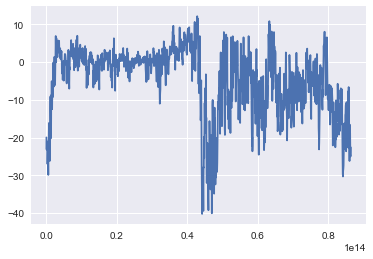

In [28]:
#plot the difference 
plt.plot(normalised_change)

In [29]:
#average all the PIRs?
norm_list = []

baseline_list = []

disrupted_list = []

#loop through all the PIRs
for PIR_b, PIR_d in zip(baseline_split_period.split_completed_list,
                        disrupted_split_period.split_completed_list):
    #grab as variables
    #baseline 
    baseline_days = PIR_b.mean(axis=1).values
    
    baseline_list.append(baseline_days)
    
    #disrupted
    disrupted_days = PIR_d.mean(axis=1).values
    
    disrupted_list.append(disrupted_days)

    #within change 
    normalised_change = disrupted_days[:len(baseline_days)] - baseline_days[:len(disrupted_days)]
    
    norm_list.append(normalised_change)

In [30]:
norm_mean=pd.DataFrame(norm_list).T.mean(axis=1)

In [31]:
baseline_mean=pd.DataFrame(baseline_list).T.mean(axis=1)

In [32]:
disrupted_mean=pd.DataFrame(disrupted_list).T.mean(axis=1)

In [33]:
#right next step do for all conditions, tidy up graphs, loop through them all

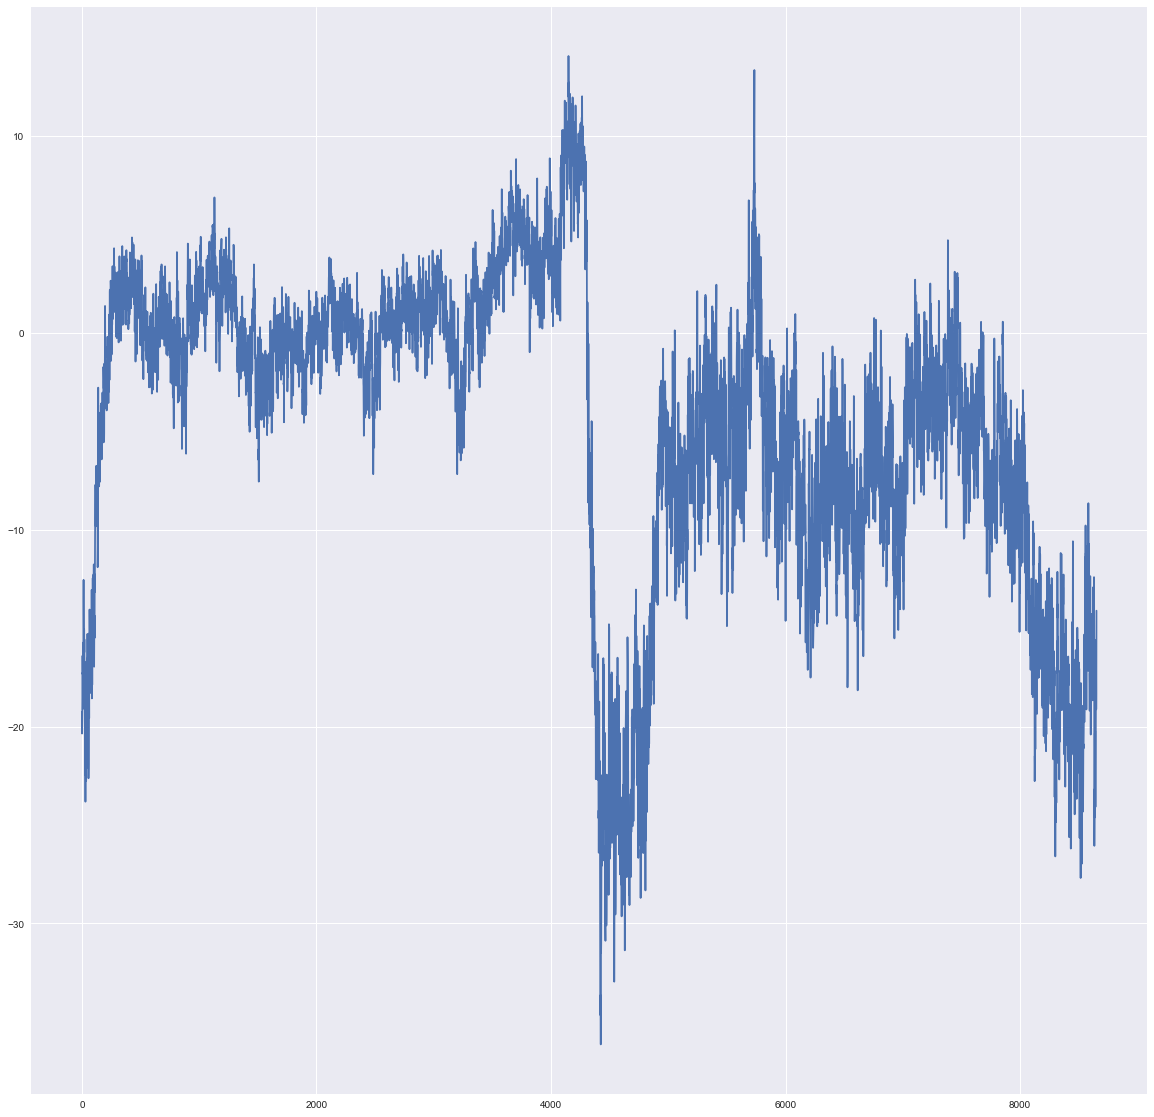

In [34]:
#step 1, make a pretty plot 
fig, ax = plt.subplots(figsize=(20,20))

ax.plot(norm_mean)



plt.show()


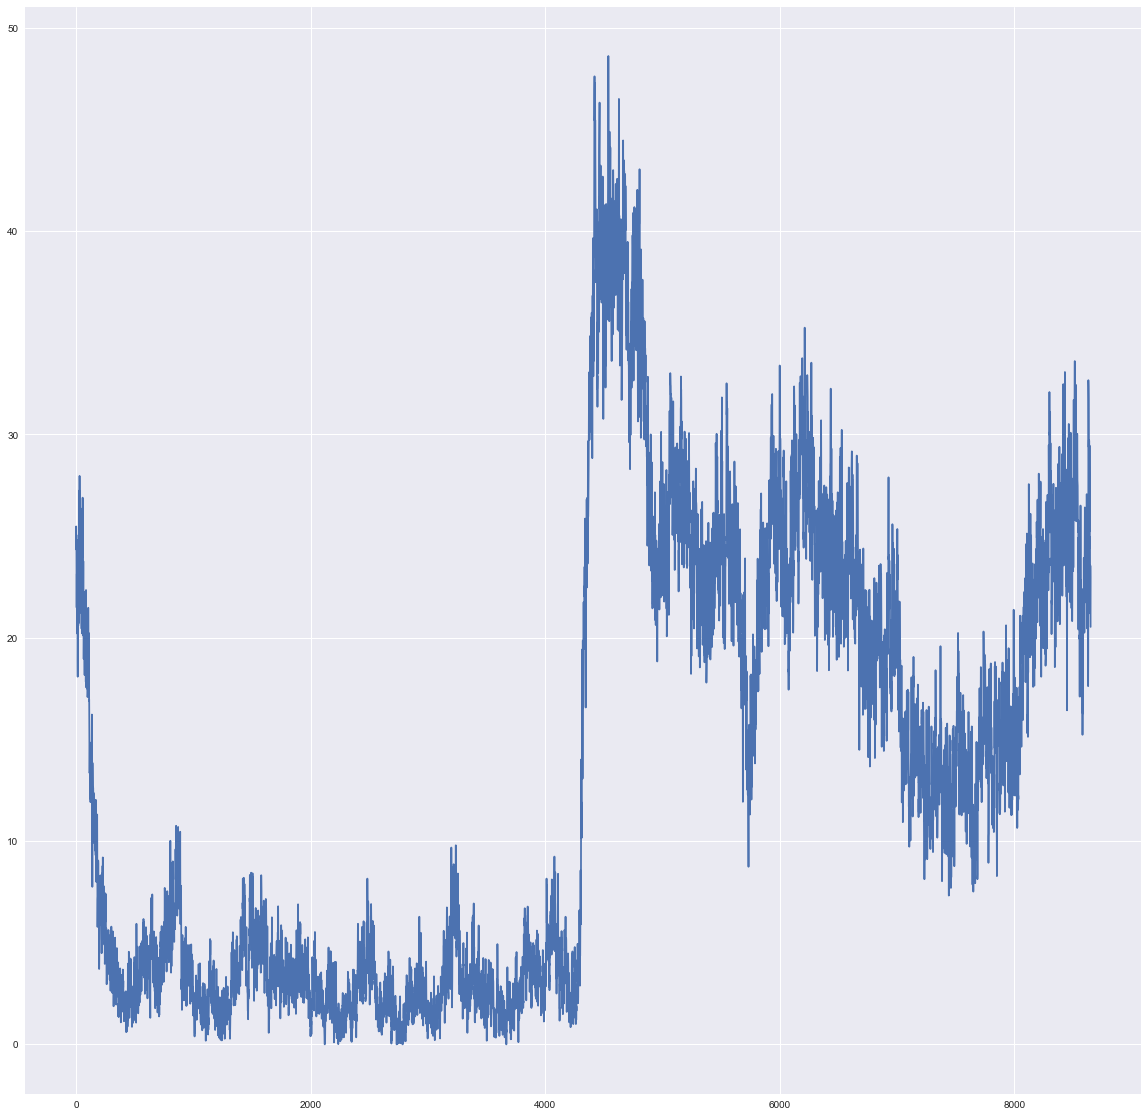

In [35]:
#step 1, make a pretty plot 
fig, ax = plt.subplots(figsize=(20,20))

ax.plot(baseline_mean)



plt.show()


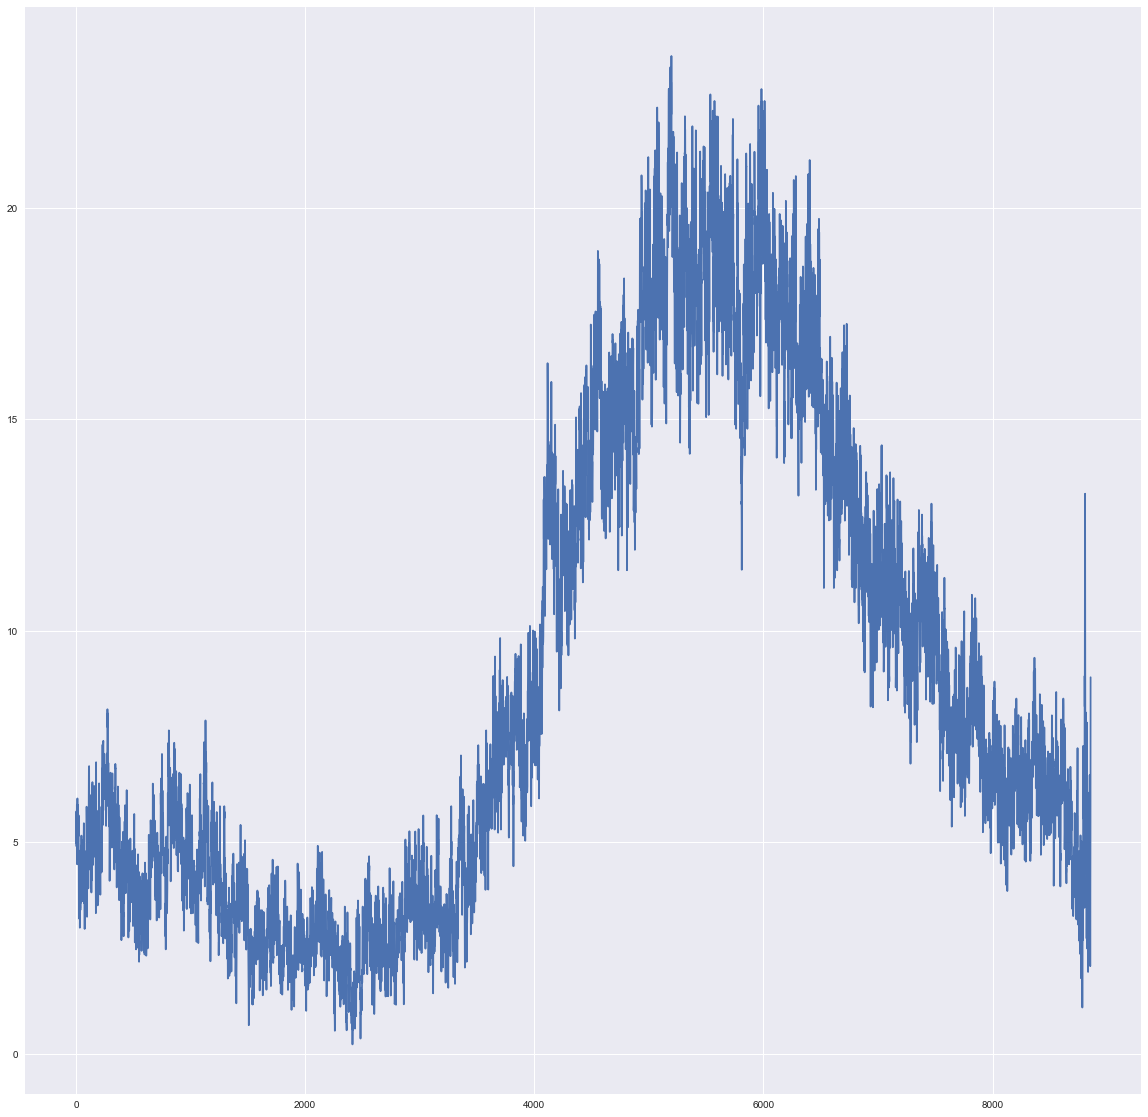

In [36]:
#step 1, make a pretty plot 
fig, ax = plt.subplots(figsize=(20,20))

ax.plot(disrupted_mean)



plt.show()
